In [2]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

/bin/bash: mkdlr: command not found
--2021-06-28 10:56:30--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  13.4MB/s    in 2m 25s  

2021-06-28 10:58:55 (13.2 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]

tar: /content/data: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
!mkdir ./data
!tar -xvf VOCtrainval_11-May-2012.tar -C /content/data

In [7]:
!ls /content/data/VOCdevkit/VOC2012
!ls /content/data/VOCdevkit/VOC2012/JPEGImages | head -n 5

Annotations  ImageSets	JPEGImages  SegmentationClass  SegmentationObject
2007_000027.jpg
2007_000032.jpg
2007_000033.jpg
2007_000039.jpg
2007_000042.jpg


(281, 500, 3)


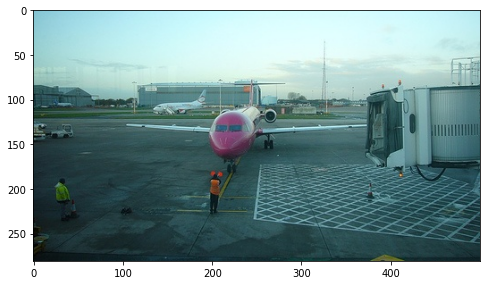

In [14]:
import cv2
import matplotlib.pyplot as plt
import os

default_dir = '/content/data'
img = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show()

## Annotations 디렉토리에 있는 임의의 annotation 파일 보기

In [15]:
!cat /content/data/VOCdevkit/VOC2012/Annotations/2007_000032.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>p

## SegmentationObject 디렉토리에 있는 임의의 masking 이미지 보기

(281, 500, 3)


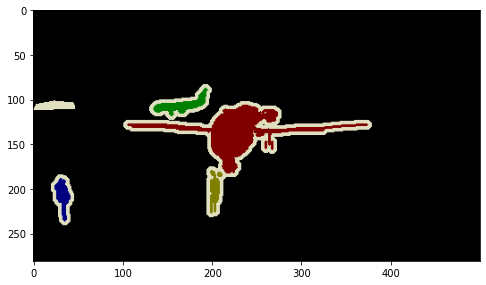

In [17]:
img = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/SegmentationObject/2007_000032.png'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show()

## Annotation xml 파일에 있는 요소들을 파싱 및 시각화

ElementTree 이용

In [21]:
import random

VOC_ROOT = "/content/data/VOCdevkit/VOC2012"
ANND_DIR = os.path.join(VOC_ROOT, "Annotations")
IMAGE_DIR = os.path.join(VOC_ROOT, "JPEGImages")

xml_files = os.listdir(ANND_DIR)
print(xml_files[:5]); print(len(xml_files))

['2007_006865.xml', '2008_003645.xml', '2009_002715.xml', '2008_005178.xml', '2010_003656.xml']
17125


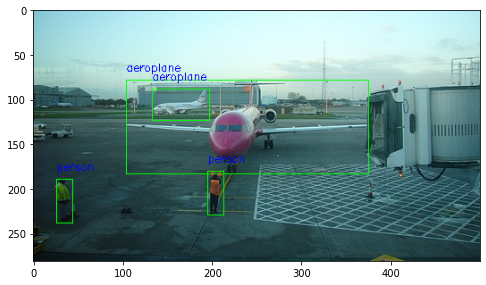

In [25]:
import xml.etree.ElementTree as ET

xml_file_32 = os.path.join(ANND_DIR, '2007_000032.xml')

tree = ET.parse(xml_file_32)
root = tree.getroot()

image_name = root.find('filename').text
full_image_name = os.path.join(IMAGE_DIR, image_name)

img = cv2.imread(full_image_name)

img_copy = img.copy()
green_color = (0, 255, 0)
blue_color = (255, 0, 0)

object_list = []
for obj in root.findall('object') :
  xml_bounding_box = obj.find('bndbox')
  x1 = int(xml_bounding_box.find('xmin').text)
  y1 = int(xml_bounding_box.find('ymin').text)
  x2 = int(xml_bounding_box.find('xmax').text)
  y2 = int(xml_bounding_box.find('ymax').text)

  class_name = obj.find('name').text

  cv2.rectangle(img_copy, (x1,y1), (x2,y2), color = green_color, thickness = 1)
  cv2.putText(img_copy, class_name, (x1,y1-10), cv2.FONT_HERSHEY_SIMPLEX, fontScale= 0.4, color = blue_color, thickness = 1)

img_copy_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(img_copy_rgb)